In [1]:
import warnings

from opticalglass.glass import get_filepath

import opticalglass as og
import opticalglass.buchdahl as buchdahl
import opticalglass.glass as ogl
from opticalglass.glassfactory import create_glass
from opticalglass import hikari

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build Multi-Index for Hikari

In [2]:
catalog = 'Hikari'
gname = 'J-FK5'
gname1 = 'Q-LASFPH3S'
gname2 = 'J-FKH2'

In [3]:
cat_pd = hikari.HikariCatalog()
cat_df = cat_pd.df

In [4]:
cat_df

category   コード Glass code          0 refractive indices                    \
data item      コードCode(d) コードCode(e)            2058.09  1970.09 1529.582   
glass                                                                       
J-FK5              487703     489701            1.46613  1.46742  1.47314   
J-FK01A            497817     498813            1.48179  1.48255  1.48604   
J-FKH1             498826     499821            1.48334  1.48404  1.48723   
J-FKH2             456914     457910            1.44327  1.44391  1.44685   
J-PKH1             519699     520697            1.49701  1.49826  1.50384   
...                   ...        ...                ...      ...      ...   
Q-LASFH12S         791450     795447            1.75381  1.75536  1.76263   
Q-LASFH58S         851401     856399            1.80962  1.81124  1.81888   
Q-LASFH59S         821425     826423            1.78242  1.78396  1.79121   
Q-LASFPH2S         765468     769465             1.7294  1.73104  1.73858   
Q-LASFPH3S         795453     799450            1.75803  1.75965  1.76712   

category                                                  ...  \
data item   1128.64  1064.14        t        s        A'  ...   
glass                                                     ...   
J-FK5       1.47773   1.4785  1.47912  1.48137  1.482813  ...   
J-FK01A     1.48909  1.48964  1.49009  1.49183  1.493004  ...   
J-FKH1      1.49009  1.49062  1.49105  1.49273   1.49388  ...   
J-FKH2      1.44943   1.4499  1.45028  1.45173  1.452705  ...   
J-PKH1       1.5084  1.50918   1.5098  1.51212  1.513636  ...   
...             ...      ...      ...      ...       ...  ...   
Q-LASFH12S  1.76952  1.77084  1.77195  1.77638  1.779505  ...   
Q-LASFH58S  1.82635  1.82783  1.82909  1.83417   1.83783  ...   
Q-LASFH59S  1.79825  1.79962  1.80079   1.8055   1.80886  ...   
Q-LASFPH2S  1.74544  1.74672   1.7478  1.75204  1.755003  ...   
Q-LASFPH3S  1.77409  1.77541  1.77653  1.78098  1.784115  ...   

category   相対 Relative Δn/ΔT  0ºC to +20ºC\n（1E-6/ºC）  \
data item                                           C   
glass                                                   
J-FK5                                            -1.6   
J-FK01A                                          -5.3   
J-FKH1                                           -6.0   
J-FKH2                                           -5.8   
J-PKH1                                            3.4   
...                                               ...   
Q-LASFH12S                                        7.0   
Q-LASFH58S                                        6.2   
Q-LASFH59S                                        7.0   
Q-LASFPH2S                                        7.9   
Q-LASFPH3S                                        7.2   

category   相対 Relative Δn/ΔT  +20ºC to +40ºC\n（1E-6/ºC）  \
data item                                             C   
glass                                                     
J-FK5                                              -1.5   
J-FK01A                                            -5.6   
J-FKH1                                             -6.3   
J-FKH2                                             -6.1   
J-PKH1                                              3.5   
...                                                 ...   
Q-LASFH12S                                          7.1   
Q-LASFH58S                                          6.3   
Q-LASFH59S                                          7.2   
Q-LASFPH2S                                          8.1   
Q-LASFPH3S                                          7.3   

category   相対 Relative Δn/ΔT  +40ºC to +60ºC\n（1E-6/ºC）  \
data item                                             C   
glass                                                     
J-FK5                                              -1.3   
J-FK01A                                            -5.8   
J-FKH1                                             -6.5   
J-FKH2                        

In [5]:
cat_df.columns.has_duplicates

False

In [6]:
nd = cat_df['refractive indices']['d'].to_numpy(dtype=float)
nF = cat_df['refractive indices']['F'].to_numpy(dtype=float)
nC = cat_df['refractive indices']['C'].to_numpy(dtype=float)

In [7]:
nd, coefs = buchdahl.calc_buchdahl_coords(nd, nF, nC)

In [8]:
coefs /= np.array((nd - 1.0), dtype=float)

## Test Series extracted from DataFrame

In [9]:
gla = cat_df.loc[gname]
gla1 = cat_df.loc[gname1]

In [10]:
cat_df.loc[gname]['dispersion coefficients']

data item
A0         2.188269
A1･λ^2     -0.00919
A2･λ^4    -0.000112
A3/λ^2     0.009264
A4/λ^4     0.000073
A5/λ^6     0.000004
A6/λ^8         -0.0
A7/λ^10         0.0
A8/λ^12           0
Name: J-FK5, dtype: object

In [11]:
gla['dispersion coefficients']

data item
A0         2.188269
A1･λ^2     -0.00919
A2･λ^4    -0.000112
A3/λ^2     0.009264
A4/λ^4     0.000073
A5/λ^6     0.000004
A6/λ^8         -0.0
A7/λ^10         0.0
A8/λ^12           0
Name: J-FK5, dtype: object

In [12]:
coefs = gla['dispersion coefficients'].to_numpy(dtype=float); coefs

array([ 2.18826855e+00, -9.19044724e-03, -1.11621071e-04,  9.26372815e-03,
        7.34900733e-05,  4.19724242e-06, -1.15412203e-07,  0.00000000e+00,
        0.00000000e+00])

In [13]:
coefs[3]

0.00926372815

In [14]:
cat_df.loc[gname]['internal transmission mm, 10']

data item
280.0      0.24
290.0      0.53
300.0      0.77
310.0       0.9
320.0     0.955
330.0     0.978
340.0     0.988
350.0     0.994
360.0     0.996
370.0     0.996
380.0     0.996
390.0     0.998
400.0     0.999
420.0     0.998
440.0     0.997
460.0     0.998
480.0     0.998
500.0     0.998
550.0     0.998
600.0     0.998
650.0     0.997
700.0     0.998
800.0     0.999
900.0     0.999
1000.0    0.999
1200.0    0.999
1400.0    0.969
1600.0    0.987
1800.0     0.98
2000.0    0.968
2200.0     0.82
2400.0      0.8
Name: J-FK5, dtype: object

In [15]:
cat_df.loc[gname]['refractive indices'].array

<PandasArray>
[ 1.46613,  1.46742,  1.47314,  1.47773,   1.4785,  1.47912,  1.48137,
 1.482813, 1.484095, 1.485343, 1.485688, 1.486009, 1.487428,  1.48749,
 1.489145, 1.492276, 1.492662, 1.495944, 1.498956, 1.500781, 1.504034]
Length: 21, dtype: object

## Test factory method, create_glass

In [16]:
gla2 = create_glass(gname2, catalog)

In [17]:
wvls = gla2.glass_data()['refractive indices'].index; wvls

Index([ 2058.09,  1970.09, 1529.582,  1128.64,  1064.14,      't',      's',
           'A'',      'r',      'C',     'C'',  'He-Ne',      'D',      'd',
            'e',      'F',     'F'',      'g',      'h',  388.865,      'i'],
      dtype='object', name='data item')

In [18]:
for w_str in wvls:
    n_line = gla2.meas_rindex(w_str)
    try:
        n_intrp = gla2.rindex(w_str)
    except KeyError:
        print(f'{w_str}: {n_line}, Key error')
    else:
        print(f'{w_str}: {n_line}, {n_intrp:9.6f}, {n_intrp-n_line:8.2g}')

2058.09: 1.44327,  1.443267, -2.5e-06
1970.09: 1.44391,  1.443907, -3.3e-06
1529.582: 1.44685,  1.446849, -1.2e-06
1128.64: 1.44943,  1.449434,  3.8e-06
1064.14: 1.4499,  1.449896, -4.3e-06
t: 1.45028,  1.450277,   -3e-06
s: 1.45173,  1.451728, -2.3e-06
A': 1.452705,  1.452705, -1.2e-07
r: 1.453592,  1.453592, -1.6e-07
C: 1.454469,  1.454469,  1.5e-07
C': 1.454714,  1.454714,   -3e-07
He-Ne: 1.454942,  1.454942, -1.3e-07
D: 1.455955,  1.455955,  3.4e-07
d: 1.456,  1.456000,  5.4e-09
e: 1.457192,  1.457192, -1.2e-07
F: 1.45946,  1.459460, -4.2e-07
F': 1.45974,  1.459740,  4.3e-07
g: 1.462126,  1.462126,    3e-07
h: 1.464317,  1.464317, -1.9e-07
388.865: 1.465643,  1.465643, -3.2e-07
i: 1.468003,  1.468003, -2.2e-07


In [19]:
gla2.meas_rindex(wvls).array

<PandasArray>
[ 1.44327,  1.44391,  1.44685,  1.44943,   1.4499,  1.45028,  1.45173,
 1.452705, 1.453592, 1.454469, 1.454714, 1.454942, 1.455955,    1.456,
 1.457192,  1.45946,  1.45974, 1.462126, 1.464317, 1.465643, 1.468003]
Length: 21, dtype: object

In [20]:
gla2.rindex(wvls)

array([1.44326747, 1.44390667, 1.44684876, 1.44943376, 1.44989565,
       1.45027696, 1.4517277 , 1.45270488, 1.45359184, 1.45446915,
       1.4547137 , 1.45494187, 1.45595534, 1.45600001, 1.45719188,
       1.45945958, 1.45974043, 1.4621263 , 1.46431681, 1.46564268,
       1.46800278])

In [21]:
gla2.meas_rindex(wvls).array-gla2.rindex(wvls)

<PandasArray>
[  2.534018963107343e-06,    3.33192770685109e-06,   1.243273763940067e-06,
 -3.7643544823495745e-06,  4.3483732208304815e-06,   3.038546531497488e-06,
  2.3033166192121257e-06,  1.1838983371426082e-07,  1.6003797820296484e-07,
 -1.4990414376470085e-07,  2.9987082372784357e-07,  1.3197445247747908e-07,
  -3.389473617332328e-07,  -5.414384718349652e-09,  1.1547634093389547e-07,
  4.1663185146312287e-07, -4.3138873651038523e-07, -2.9801270695628546e-07,
  1.8931080214557028e-07,  3.1741069683732803e-07,  2.2128252630260192e-07]
Length: 21, dtype: object

In [22]:
cat_df.loc[gname]['specific gravity']['d']

2.45

In [23]:
cat_df.loc[gname]['chemical properties']

data item
表面法耐酸性AR(S) Acid resistance　(surface method)    2
耐洗剤性PR(S) Alkaline detergent resistance         3
耐候性CR(S) Climate resistance                     2
粉末法耐水性WR(P)　Water resistance (powder method)    4
粉末法耐酸性AR(P) Acid resisitance（powder method)     5
Name: J-FK5, dtype: object

In [24]:
cat_df.loc[gname]['thermal properties']

data item
常温線膨張係数α（1E-7/ºC）　Thermal expansion （-30, +70ºC）         89
高温線膨張係数α（1E-7/ºC）　Thermal expansion （+100, +300ºC）       97
転移温度Tg Glass transformation temperature                 468
屈伏点At Yield point                                       559
歪点StP\nStrain point                                       -
徐冷点AP\nAnnealing point                                    -
軟化点SP\nSoftening point                                    -
熱伝導率λ　Thermal conductivity                             1.03
比熱c　Specific heat capacity                            0.795
熱拡散率κ Thermal diffusivity                             0.532
Name: J-FK5, dtype: object

In [25]:
cat_df.loc[gname]['mechanical properties']

data item
ヌープ硬さHｋ　Knoop hardness               432 (4)
磨耗度Ａ　Abrasion hardness                   126
ヤング率Ｅ　Young's　modulus                   60.1
剛性率Ｇ　Shear modulus                      24.3
ポアソン比μ　Poisson's ratio                 0.235
光弾性定数β　Stress optical coefficient       2.97
Name: J-FK5, dtype: object

In [26]:
cat_df.loc[[gname, gname1]]['mechanical properties']['ヌープ硬さHｋ　Knoop hardness']

glass
J-FK5         432 (4)
Q-LASFPH3S    660 (7)
Name: ヌープ硬さHｋ　Knoop hardness, dtype: string

In [27]:
cat_df.loc[gname1]['internal transmission mm, 10']

data item
280.0         -
290.0      0.06
300.0      0.13
310.0      0.22
320.0      0.39
330.0      0.56
340.0      0.69
350.0      0.79
360.0      0.87
370.0      0.92
380.0     0.949
390.0     0.966
400.0     0.977
420.0     0.986
440.0      0.99
460.0     0.993
480.0     0.995
500.0     0.997
550.0     0.998
600.0     0.998
650.0     0.998
700.0     0.998
800.0     0.995
900.0     0.992
1000.0    0.994
1200.0    0.999
1400.0    0.994
1600.0    0.991
1800.0     0.98
2000.0    0.964
2200.0     0.92
2400.0     0.73
Name: Q-LASFPH3S, dtype: object

In [28]:
cat_df['refractive indices']['d'].array

<FloatingArray>
[ 1.48749,    1.497,  1.49782,    1.456,   1.5186,    1.618,    1.603,
  1.59319,  1.59349,  1.62846,
 ...
  1.69343,    1.743, 1.743104,  1.80604,  1.77387,  1.79063,  1.85108,
  1.82098, 1.765437, 1.795256]
Length: 160, dtype: Float64

In [29]:
trns_data = cat_df.loc[[gname, gname1]]['internal transmission mm, 10'].T; trns_data

glass,J-FK5,Q-LASFPH3S
data item,,
280.0,0.24,-
290.0,0.53,0.06
300.0,0.77,0.13
310.0,0.9,0.22
320.0,0.955,0.39
330.0,0.978,0.56
340.0,0.988,0.69
350.0,0.994,0.79
360.0,0.996,0.87


<AxesSubplot:xlabel='data item'>

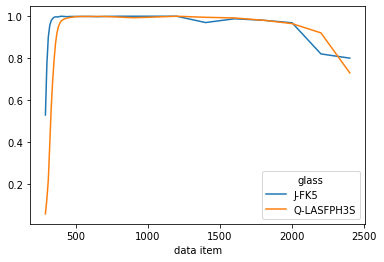

In [30]:
trns_data[290.0:2400.0].plot()

<AxesSubplot:xlabel='data item'>

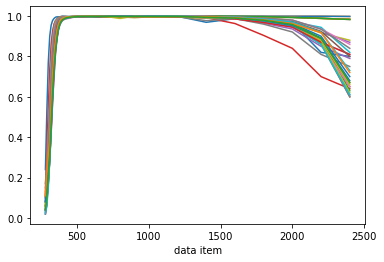

In [31]:
cat_df['internal transmission mm, 10'].T.plot(legend=False)

In [32]:
gla_v2 = hikari.HikariGlass(gname)

In [33]:
gla_v2.meas_rindex('F')

1.492276

In [34]:
gla_v2.glass_code()

'487.703'

In [35]:
t_wvls = gla2.glass_data()['internal transmission mm, 10'].index.to_numpy(dtype=float); t_wvls

array([ 280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,  360.,
        370.,  380.,  390.,  400.,  420.,  440.,  460.,  480.,  500.,
        550.,  600.,  650.,  700.,  800.,  900., 1000., 1200., 1400.,
       1600., 1800., 2000., 2200., 2400.])

In [36]:
gla2.transmission_data()

(array([ 280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,  360.,
         370.,  380.,  390.,  400.,  420.,  440.,  460.,  480.,  500.,
         550.,  600.,  650.,  700.,  800.,  900., 1000., 1200., 1400.,
        1600., 1800., 2000., 2200., 2400.]),
 array([0.   , 0.   , 0.06 , 0.18 , 0.39 , 0.61 , 0.79 , 0.89 , 0.949,
        0.976, 0.988, 0.993, 0.995, 0.994, 0.994, 0.996, 0.996, 0.998,
        0.999, 0.998, 0.997, 0.998, 0.996, 0.994, 0.994, 0.995, 0.994,
        0.994, 0.991, 0.995, 0.994, 0.998]))

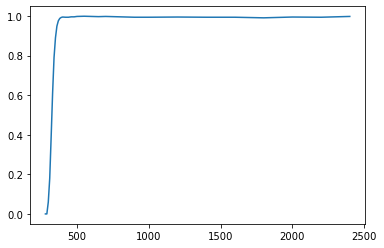

In [38]:
plt.plot(*gla2.transmission_data())